**Visualize all tracks in file '2017-05-17_00h_tracks.csv' :**

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import csv

num_TOs = 1500

# Loading original tracks data:
cols = ['ID','Time','x', 'y','Speed','Type','Estimated']
data = pd.read_csv('2017-05-11_00h_tracks.csv',index_col=False, header=None,sep=';',names=cols )
data = data.drop(data.index[0])   # drops the first row
df = data[(data['Type'] == 2)]  # only selecting TO of type 2 (car)


# creating new data frame for plotting trajectories: 
df = df[['ID', 'Time','x', 'y']]

print(df.head())

# path to to put saved file:
path = r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_17_R'

# the file is currently named 'selected_path.csv':
df.to_csv(os.path.join(path, r'xy_all.csv'), index=False)

print('Selected paths saved to csv !')

**Selecting x-y coordinates which only contain RIGHT turn :**

In [21]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import csv

#num_TOs = 1500
x_left_bound = -35
x_right_bound = 0
y_upper_bound = -20
y_lower_bound = 15

x_condition_2 = -7 
y_condition_2 = -15 
theta = 26.565

# Loading original tracks data:
cols = ['ID','Time','x', 'y','Speed','Type','Estimated']
data = pd.read_csv('2017-05-11_00h_tracks.csv',index_col=False, header=None,sep=';',names=cols )
data = data.drop(data.index[0])   # drops the first row

df1 = data[(data['Type'] == 2)]  # only selecting TO of type 2 (car)

# rotate x-y-coordinates by theta to align the road with the x-y axis in the map:
df1['x_rot'] = df1['x'].multiply(np.cos(theta)) - df1['y'].multiply(np.sin(theta))
df1['y_rot'] = df1['x'].multiply(np.sin(theta)) + df1['y'].multiply(np.cos(theta))


# creating new data frame for plotting trajectories: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

grouped = df1.groupby(['ID'])   # selecting only TO ID:s that fullfill x-y coord. condition for right turn
for ID,group in grouped:

    df_temp = pd.DataFrame({'x_cond':group['x'].between(x_left_bound, x_right_bound),
                            'y_cond':group['y'].between(y_upper_bound, y_lower_bound)
                            ,'x_cond2':(group['x'] < x_condition_2).all()
                            ,'y_cond2':(group['y'] > y_condition_2).all()
                           })
    
    if df_temp.all(axis=None):   # if boundary conditions for x and y are fullfilled
        df = df.append(group[['ID','Time','x','y']])

# path to to put saved file:
path = r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R'

# the file is currently named 'selected_path.csv':
df.to_csv(os.path.join(path, r'xy_right_turn.csv'), index=False)

print('Selected paths saved to csv !')

          ID                              Time                   x  \
1  140000492  2017-05-11 00:00:08.217000+02:00   18.55801493447774   
2  140000492  2017-05-11 00:00:08.469000+02:00  18.864835065229105   
3  140000492  2017-05-11 00:00:08.722000+02:00   19.21518615117601   
4  140000492  2017-05-11 00:00:08.977000+02:00  19.541609218081078   
5  140000492  2017-05-11 00:00:09.226000+02:00  19.885971878448565   

                      y               Speed Type Estimated  
1  -0.37398451686763373   9.052394386408439    0         1  
2  -0.14204559149524865  6.8992916180282355    0         0  
3  -0.13663257597532658   5.455981323000933    0         0  
4  0.008212197104468097   5.308647772761987    0         0  
5    0.3030745094439874   5.721938177631369    0         0  


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Selected paths saved to csv !


**Further filtering of xy-coord by length of sequences :**

In [39]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import csv

# Loading original tracks data:

data = pd.read_csv('xy_right_turn.csv' )
data = data.drop(data.index[0])   # drops the first row

df1 = data[['ID','Time','x', 'y']]

# creating new data frame for plotting trajectories: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

grouped = df1.groupby(['ID'])   # selecting only TO ID:s that fullfill x-y coord. condition for right turn
for ID,group in grouped:
    num_row = group.shape[0]
    if num_row > 30:   # if boundary conditions for x and y are fullfilled
        df = df.append(group[['ID','Time','x','y']])

# path to to put saved file:
path = r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R'

# the file is currently named 'selected_path.csv':
df.to_csv(os.path.join(path, r'xy_right_turn_filtered.csv'), index=False)

print('Selected paths saved to csv !')

Selected paths saved to csv !


**Checking if time matches between state vector file and xy-file , seems like state vector is ~ 0,509 seconds ahead:**

In [49]:
import pandas as pd
import numpy as np
import json
import csv
from datetime import datetime
from datetime import timedelta
import os

# Loading original tracks data:
data = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\xy_right_turn_filtered.csv')

data = data.drop(data.index[0])   # drops the first row


df1 = data[['ID','Time']]

# Loading data with occupancy grid:
data2 = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\result_2017_05_11_R.csv')

data2['ID'] = data2['Object id']

del data2['Object id']
del data2['State time']


# choosing ID:s in df2 that also exists in df1:
df2 = data2.loc[data2['ID'].isin(df1['ID'])]
df2['ID'] = df2['ID'].astype('int32')
#print(df2.dtypes)
# choosing ID:s in df1 that is also existing in df2:
df1 = df1.loc[df1['ID'].isin(df2['ID'])]
df2 = df2[['ID', 'Time id']]
print(df1.head())

temp = df2.loc[df2['ID']==140018962]

# calculating state time for data containing occupancy grid:
temp['Time id'] = temp['Time id'].astype(float)
start_time = pd.to_datetime('2017-05-17 00:00:01.285') 
temp['State time'] = start_time + timedelta(seconds=0.3)*temp['Time id'] - timedelta(seconds=0.509)

print('\n')
print('new')
print(temp.iloc[0:4])



C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


           ID                              Time
40  140018962  2017-05-11 07:50:56.876000+02:00
41  140018962  2017-05-11 07:50:57.129000+02:00
42  140018962  2017-05-11 07:50:57.381000+02:00
43  140018962  2017-05-11 07:50:57.633000+02:00
44  140018962  2017-05-11 07:50:57.886000+02:00


new
              ID  Time id              State time
34328  140018962  94187.0 2017-05-17 07:50:56.876
34329  140018962  94188.0 2017-05-17 07:50:57.176
34330  140018962  94189.0 2017-05-17 07:50:57.476
34331  140018962  94190.0 2017-05-17 07:50:57.776


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Selecting state vector (RIGHT turn) which corresponds in time with xy-file cut in approximately same position :**

In [57]:
'''
coordinates for restricted area in 'result_R.csv' is : [[[-10, -25],[30, -25]],[[-10, 20],[30, 20]]]
'''
import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
from datetime import timedelta
import os

minimum_sequence = 15  # sequence of xy-trajectories for map plotting 
# num_TOs = 1500

# Loading file which contains x-y coord for right turn paths:
cols = ['ID','Time','x','y']
data1 = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\xy_right_turn_filtered.csv',index_col=False, header=None,sep=',',names=cols )
data1 = data1.drop(data1.index[0])   # drops the first row
#df1 = data1[(data1['Type'] == 2)]  # only selecting TO of type 2 (car), allready filltered out above
df1 = data1

df1['Time'] = pd.to_datetime(df1['Time']) 
df1['Time'] = df1['Time'].astype('datetime64[ns]')
df1['ID'] = df1['ID'].astype('int32')
df1['ID'] = pd.to_numeric(df1['ID'])
df1['x_numeric'] = pd.to_numeric(df1['x'])

# deleting xy-rows which has x-coord. above 18:
indexRows = df1[ df1['x_numeric'] >= 18].index
df1.drop(indexRows , inplace=True)
del df1['x_numeric']
# Loading data with occupancy grid:
data2 = pd.read_csv('result_2017_05_11_R.csv')
data2['ID'] = data2['Object id']
del data2['Object id']
del data2['State time']


# choosing ID:s in df2 that also exists in df1:
df2 = data2.loc[data2['ID'].isin(df1['ID'])]
df2['ID'] = df2['ID'].astype(float)
#print(df2.dtypes)
# choosing ID:s in df1 that is also existing in df2:
df1 = df1.loc[df1['ID'].isin(df2['ID'])]



# calculating state time for data containing occupancy grid:
df2['Time id'] = df2['Time id'].astype(float)
start_time = pd.to_datetime('2017-05-11 00:00:08.217') 
df2['State time'] = start_time + timedelta(seconds=0.3)*df2['Time id'] - timedelta(seconds=0.509)

df_state = df2
# path to to put saved file:
path = r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R'

# the file is currently named 'xy_right_time_matching.csv':
df.to_csv(os.path.join(path, r'xy_right_time_matching_cut.csv'), index=False)

# the file is currently named 'state_vector_right_turn.csv':
df_state.to_csv(os.path.join(path, r'state_vector_right_turn_cut.csv'), index=False)

print('Selected paths saved to csv !')


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

Selected paths saved to csv !


**Doing some more removal of outliers and creating 3D plot with state vectors and xy-file for trajectory plotting :**

<IPython.core.display.Javascript object>


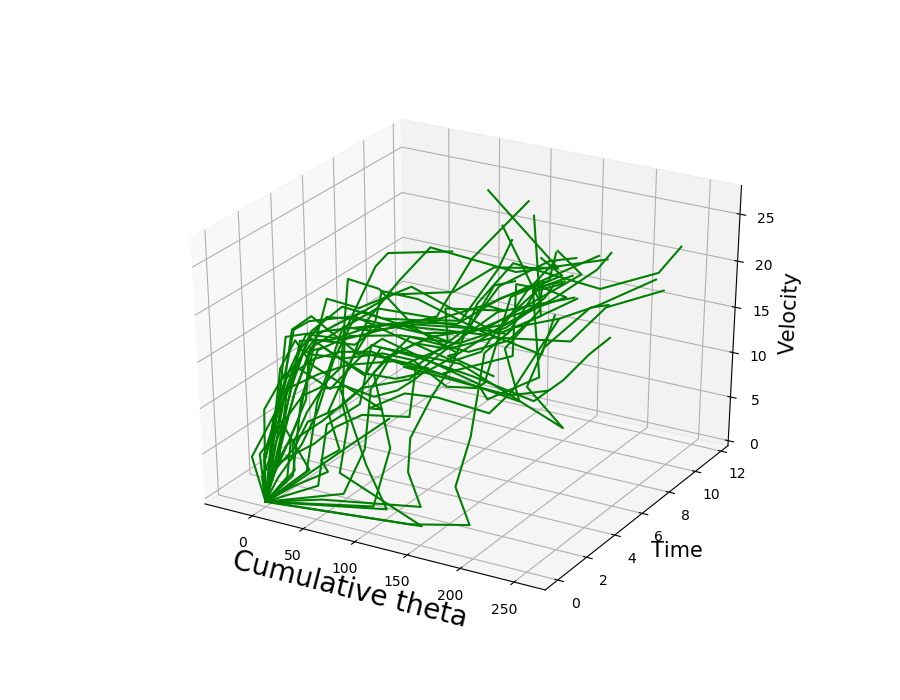

C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [83]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_step = 3   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains x-y coord for right turn paths:
cols = ['ID','Time','x','y']
xy_data = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\xy_right_time_matching_cut.csv',index_col=False, header=None,sep=',',names=cols )
df_xy = xy_data
df_xy = df_xy.drop(df_xy.index[0])   # drops the first row

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\state_vector_right_turn_cut.csv')
df_state = state_data

#df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['Delta theta'] = df_state['Delta theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
#print(df_test.dtypes)
fig = plt.figure(figsize=(9,7))
ax = fig.gca(projection='3d')

# creating empty data frame to store path where outliers are removed (needed to plot paths in map):
df_map = pd.DataFrame()
df_filtered = pd.DataFrame()
grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    theta = group['Delta theta']
    theta = theta.to_numpy()
    theta = np.insert(theta,0,0)
    theta = theta*180/np.pi
    theta = np.cumsum(theta) 
    theta_sum = theta[-1]
    time = np.arange(len(group)+1)*0.3
    time_last = time[-1]
    velocity = group['Velocity'].to_numpy()
    velocity = np.insert(velocity,0,0) 
    v_plot = velocity[-1]
    if not((theta > 300).any() or (theta < -28.5).any() or (time > 12).any() ):  # filtering out outliers for cumulative theta values
  
        plot_data = pd.DataFrame({'Velocity': velocity, 'Cum_theta': theta, 'Time': time})
        time_plot = plot_data['Time'].iloc[::plot_step].to_numpy()
        velocity_plot = plot_data['Velocity'].iloc[::plot_step].to_numpy()
        theta_plot = plot_data['Cum_theta'].iloc[::plot_step].to_numpy()
        ax.plot3D(theta_plot, time_plot,velocity_plot, 'green')
        df_temp = df_xy.loc[df_xy['ID'] == ID, ['ID', 'Time', 'x', 'y']]
        df_map = df_map.append(df_temp)
        df_temp2 = pd.DataFrame({'cumulative theta': theta[1:len(theta)],'time elapsed': time[1:len(time)]})
        group['theta plot'] = theta_sum
        group['time plot'] = time_last
        group['v plot'] = v_plot
        group = group.reset_index(drop=True)
        group = pd.concat([df_temp2,group], axis=1)
        df_filtered = df_filtered.append(group)
              
# label axes
ax.set_xlabel('Cumulative theta', fontsize=20)
ax.set_ylabel('Time', fontsize=15)
ax.set_zlabel('Velocity', fontsize=15)
plt.show()

# path to to put saved file:
path = r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R'

# the file is currently named 'xy_right_time_matching.csv':
df_map.to_csv(os.path.join(path, r'xy_R_filtered_2017_05_11.csv'), index=False)

# the file is currently named 'state_vector_right_turn.csv':
df_filtered.to_csv(os.path.join(path, r's_vect_R_2017_05_11.csv'), index=False)



**Conversion to lat-long coord:**

In [40]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import csv

""" Converts data x-y coordinates into latitudinal and longitudinal positions.
 Specify below the path where the csv file is to be saved. Requires Pandas and Numpy package."""

########################################################################################################################
# lat <=> y, long <=> x
ref_position = np.array([59.916559, 10.734520])
lat = 59.916687
lon = 10.734836
position = [lat, lon]

diff_lat = position[0] - ref_position[0]
diff_lon = position[1] - ref_position[1]

diff_x = 23.41
diff_y = -20

const_lat = np.round(diff_lat/diff_y, 6)
const_lon = np.round(diff_lon/diff_x, 6)

theta = np.pi + np.pi/2

########################################################################################################################

cols = ['ID','Time','x', 'y']

# Add the csv file to be converted here:
df = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\xy_right_turn_filtered.csv', index_col=False, header=None, sep=',', names= cols)
df = df.drop(df.index[0])   # drops the first row

df['lat'] = df['y'].astype(float)
df['long'] = df['x'].astype(float)
df['x'] = df['long'].astype(float)
df['y'] = df['lat'].astype(float)

# rotate x-y-coordinates by pi/2:
#df['x_new'] = df['x'].multiply(np.cos(theta)) - df['y'].multiply(np.sin(theta))
#df['y_new'] = df['x'].multiply(np.sin(theta)) + df['y'].multiply(np.cos(theta))

df['const_lat'] = const_lat
df['const_long'] = const_lon
df['ref_lat'] = ref_position[0]
df['ref_long'] = ref_position[1]

df['lat'] = df['y'].multiply(df['const_lat'])
df['lat'] = df['lat'].add(df['ref_lat'])

df['long'] = df['x'].multiply(df['const_long'])
df['long'] = df['long'].add(df['ref_long'])

#df = df.drop(['const_lat', 'const_long', 'ref_lat', 'ref_long', 'x', 'y', 'x_new', 'y_new'], axis=1)
df = df.drop(['const_lat', 'const_long', 'ref_lat', 'ref_long', 'x', 'y'], axis=1)

# rounding positions coordinates to 6 decimals:
df = df.round({'lat': 6, 'long': 6})

# path to to put saved file:
path = r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R'

# the file is currently named 'LatLongData.csv':
df.to_csv(os.path.join(path, r'LatLongData_area_2017_05_11_R.csv'), index=False)

print('conversion completed!')
df_converted = df


conversion completed!


**Creating geojson file:**

In [41]:
import pandas as pd
import numpy as np
import json
import csv


''' This script converts the a data frame with columns: 'ID', 'lat', long' into geojson file for plotting '''

########################################################################################################################
'''
# example data:    note: the 'lat' and 'long' must not be of typ numpy.int64 !
Data = {'ID': [1, 1, 1, 1, 2, 2, 2, 2, 2, 2], 'lat':  [10.734221, 10.734474, 10.734661, 10.734940,  10.734114,
                                                       10.734527, 10.734436, 10.734168, 10.733894, 10.733749],
        'long': [59.916174, 59.916397, 59.916545, 59.916757,  59.916206, 59.916521, 59.916615, 59.916679, 59.916765,
                 59.916798]
        }
df = DataFrame(Data, columns=['ID', 'lat', 'long'])

'''
########################################################################################################################
cols = ['ID','Time','lat', 'long']
# Add the csv file to be converted here:
df = pd.read_csv(r'C:\Users\Desktop\CAS\Project_course_math_stat_modelling\2017_05_11_R\LatLongData_area_2017_05_11_R.csv', index_col=False, header=None, sep=',', names=cols)
df = df.drop(df.index[0])   # drops the first row
del df['Time']
#df = df.loc[:, ['ID', 'lat', 'long']]


# choose number of traffic objects to plot:
num_TO = 900
TO_unique = df.ID.unique()
batch = TO_unique[0:num_TO]
df = df[df['ID'].isin(batch)]

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
def df_to_geojson(df):
    # extracting unique TO IDs:
    TO_unique = df.ID.unique()
    MultiLineString = []
    for object in TO_unique:
        # converts the the data frame to an array  [[ , ],[ , ],...[ , ]] :
        string = df.loc[df['ID'] == object].values
        # deleting first element in the array (corresponding to the ID value):
        string = np.delete(string, np.s_[0], 1)
        num_rows = len(string)
        object_string = []
        for row in range(num_rows):
            string[row][0] = np.round(string[row][0], 6)
            string[row][1] = np.round(string[row][1], 6)
            object_string.append([string[row][1], string[row][0]])
        MultiLineString.append(object_string)

    geojson_dict = {'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {}, 'geometry':
        {'type':'MultiLineString', 'coordinates': MultiLineString}}]}

    return geojson_dict

geojson_dict = df_to_geojson(df)

geojson_str = json.dumps(geojson_dict, indent=2)

# save the geojson result to a file
output_filename = 'TO_paths_2017_05_11_R.geojson'


#with open(output_filename, 'wb') as output_file:
with open(output_filename, 'w') as output_file:
    output_file.write('{}'.format(geojson_str))

print('geojson created!')

geojson created!
